# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [27]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


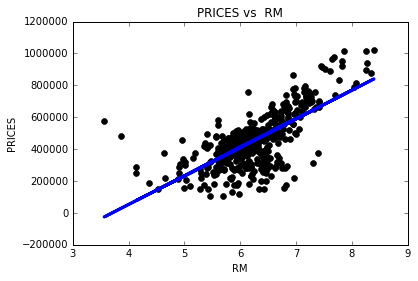

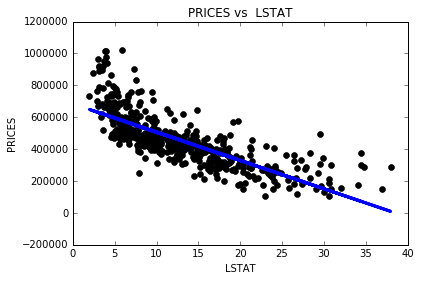

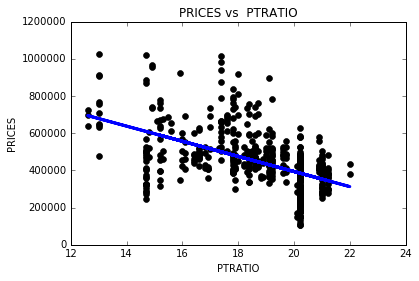

In [28]:
# TODO: Minimum price of the data
minimum_price = np.amin(prices)

# TODO: Maximum price of the data
maximum_price = np.amax(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

# Following code was recommended by one of the evaluators to validate the
# observations in question one.
import matplotlib.pyplot as plt
import numpy as np

for col in features.columns:

    fig, ax = plt.subplots()
    fit = np.polyfit(features [col], prices, deg=1) # We use a linear fit to compute the trendline
    ax.scatter(features [col],  prices)
    plt.plot(features [col], prices, 'o', color='black')
    ax.plot(features[col], fit[0] * features[col] + fit[1], color='blue', linewidth=3) # This plots a trendline with the regression parameters computed earlier. We should plot this after the dots or it will be covered by the dots themselves
    plt.title('PRICES vs  '+ str(col)) # title here
    plt.xlabel(col) # label here
    plt.ylabel('PRICES') # label here


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **
The price of a house is based on the square footage of the land where it seats. More rooms mean more square feet equivalent to more money. Same way less rooms mean less square feet. Directly Proportional
Increase of RM will increase the MEDV value.
Decrease of RM will decrease the MEDV value.

Lower class workers living in the neighborhood means that they can afford a house in there, which in turns means that the prices are low enough to be affordable with a low income. Inversely Proportional.
Increase of LSTAT will decrease the MEDV value.
Decrease of LSTAT will increase the MEDV value.

The bigger a teacher class is, the less focus on each student he/she will put and the lesser the student performance could be. This could be seen as a school with poor education. Bad school reputation tends to lower the value of the property close to the school because in a logical world parents are looking for the best possible eduction for their childrem. Inversely Proportional.
Increase of PTRATIO will decrease the MEDV value.
Decrease of PTRATIO will increase the MEDV value.


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [29]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [30]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**
Yes, The R2 score is closer to "1" which is a pretty good score. If the R2 score represents how well the model is capable to predict the true value using the given features, we can say that our model did fantastic. 

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [31]:
# TODO: Import 'train_test_split'
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(features,prices,test_size=0.20,random_state=10)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** 
What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?
Using the data used for training as the test data can lead to overfitting. The benefit of splitting is to test the model using a set of unknown data. An overfit model doesn't generalize coorectly.

What could go wrong with not having a way to test your model?
Not having a way, to test a model selected from a group of possible candidates, leads to a Bias model. This is because you will select the model with the best training score which introduces the Bias. Your testing data can't be used during your selection process, but it can be used to test the selected moodel to reduce any bias introduced during the training process. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

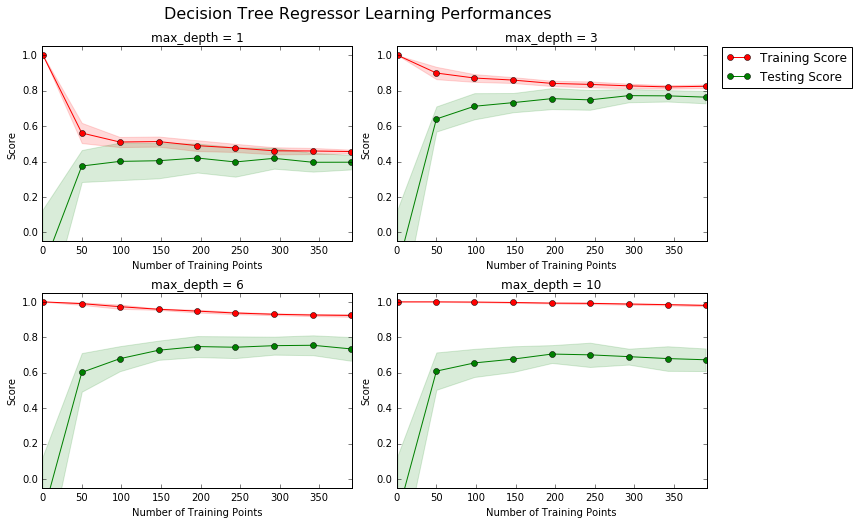

In [7]:
import visuals as vs
import pandas as pd
# Pretty display for notebooks
%matplotlib inline
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **
For the max_depth = 3 as more training data points are added the training curve score decreases a few points until gets plateau around 350 points. The testing curve with few data points shows a terrible performance but as more data points the performance starts to get better up to the point of getting almost plateau around the same 350 points as the training curve. At this point the model performance has a high score and the gap between training & test is the smallest of all max_depth which means that at this point the model has very good generalization. Adding more training data point after 350 doesn't seem to improve the generalization further. Curves almost coverge at 350 data points but they never fully converge like the ones at max_depth = 1, nevertheless max_depth = 1 score is very poor.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

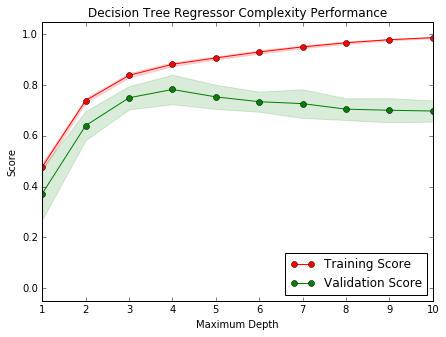

In [8]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **
At max_depth "1" the model suffers from high bias. Because the low score looks like it is not capable of decribe the complexity of the data. 
At max_depth "10" the model has high variance and it doesn't generalize data well.
High bias is shown by both curve coverging or getting close to each other at a particular lower score.
High variance is shown by a big gap between the training and the test curves.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **
max_depth = 3. At this max_depth the gap between both curves are very small and the score is high for the test curve. And both curves seem to be stable no matter if we keep incresing the training data points. This means that the model is generalizing well.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **
Grid search is a technic to systematically working through multiple combination of a classifier (aka estimator) algorithm's parameters with the purpose of tune its performance. 

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **
What is the k-fold cross-validation training technique? 
K-fold is  cross validation technic that consists in splitting a dataset in a training subset and a test subset. The training subset is further splitted into "k" bins. Then each round we will take a different bin aside (validation bin) and use the reamining data (k - 1) to train our estimator. On each round we will validate the estimator using the validation bin that was set aside. On each round the training bin and the validation bin generates an error rate value. We will average all error rate values and that will give us the training error rate. Finally we will use the test subset to test the whole training subset and that will give us a test error rate. Using different sizes of data points to run through this cross validation technic allow us to plot a learning curve.

The kfold cross validation technic is used to select a model and also to test our selection to see how it performs with unseen data.


What benefit does this technique provide for grid search when optimizing a model? 
Grid search is an optimizing technic, which iterates over an estimator (a.k.a model) parameters to identify the best possible values for them. It relies on the evaluation of the estimator performance to determine which paramters work better than other.If we evaluate an estimator using the same data used for training, it will score good (we are telling it in advanced the answer to the questions we will ask). This will cause grid search to optimze the model to memorize the training data. An estimator tune this way will produce an overfit learning model and won't generalized too well.

Kfold solves the above situation by passing a set of training data to traing the estimator using a group of parameters (training/validation subset) and another kfold subset (test subset) to get the performance of the it using such parameters group. Repeating this with different group of parameters each time allow the gridsearch algorithm to compare several test error rates and select the group of parameters with the smallest test error rate. As a consecuence the group of estimator's selected parameters are the one that optimized it to the best performance.   

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [32]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn import tree
from sklearn import grid_search
from sklearn import cross_validation

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = cross_validation.ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = tree.DecisionTreeClassifier()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = grid_search.GridSearchCV(regressor,params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [33]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 5 for the optimal model.


**Answer: **
The optimal model max_depth is 5. My answer in "question 4", suggested an optimal performance at max_depth = 3. I plotted (see additional png projects files) the learning curves using a max_depth of 3,4 and 5 as the regressor parameters instead of using the gridsearchcv function and used the same cv_sets and score objects. 
Plots were different from the ones produced by the vs.ModelLearning() function, but they showed that with a max_depth of 5 both curves converge at a higher performance value and are more uniform that at max_depth 3 and 4. This tells us that the estimator benefits if our model is a little more complex (max_depth = 5) than the one we picked as optimal (max_depth =3) in the previous question. The learning curve at max_depth 6 shows the performance decreases so more complexity will negatively affect the model.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

Predicted selling price for Client 1's home: $455,700.00
Predicted selling price for Client 2's home: $155,400.00
Predicted selling price for Client 3's home: $697,200.00
The predicted 5 nearest neighbors price for home 1 is: $372,540.00
The predicted 5 nearest neighbors price for home 2 is: $162,120.00
The predicted 5 nearest neighbors price for home 3 is: $897,120.00


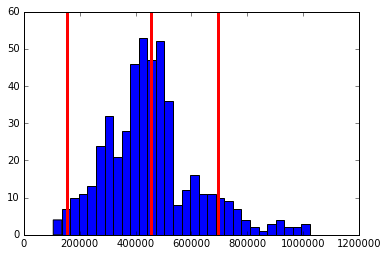

In [44]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

# Added as a recommendation of the reviewer 2. It is used to 
# evaluate how accurate the prediction is based on:
# Is the prediction value within the distribution max/min
# Is the prediction within one standard deviation std = 165,171.13 mean = 454,342.94
# Client 1 is within one std
# Client 2 is within two std
# Client 3 is within two std

import matplotlib.pyplot as plt
plt.hist(prices, bins = 30)
for price in reg.predict(client_data):
    plt.axvline(price, c = 'r', lw = 3)

# Added as per a recommendation of the reviewer 3. It servers 
# a similar purpose as the above graphic. But the idea is to find the avergare
# price of the nearest 5 neighbors (have similar features) to the preticted value and
# find how far from it the predicted value is. In average the distance is $94600 
# Lower predicted priceses seem to be more accurate than higher prices as per the nearest neighbor 
# validation.

from sklearn.neighbors import NearestNeighbors
num_neighbors=5
def nearest_neighbor_price(x):
    def find_nearest_neighbor_indexes(x, X):  # x is your vector and X is the data set.
        neigh = NearestNeighbors( num_neighbors )
        neigh.fit(X)
        distance, indexes = neigh.kneighbors( x.reshape(1,-1) )
        return indexes
    indexes = find_nearest_neighbor_indexes(x, features.as_matrix())
    sum_prices = []
    for i in indexes:
        sum_prices.append(prices[i])
    neighbor_avg = np.mean(sum_prices)
    return neighbor_avg
index = 0  
for i in np.asarray(client_data):
    val=nearest_neighbor_price(i)
    index += 1
    print "The predicted {} nearest neighbors price for home {} is: ${:,.2f}".format(num_neighbors,index, val)

**Answer: **
For Client 1: \$455,700.00
For Client 2: \$155,400.00
For Client 3: \$697,200.00

Yes, more rooms means more square footage (higher price), less poverty levels means higher income (higher price), less students per teacher means better quality of the education higher demand (higher price). 
Client 3 requires more rooms, less poverty levels and better education so its house must be the more expensive of the three, as our estimator predicted correctly. 
Client 2 requieres less rooms than than any other client, doesn't care about a greater poverty level and poorly eduction; so the house's price should be the lesser of thr three, as our estimator corrrectly predicted. 
Client 1 requirements which has 1 more room than client 2, close to 50\% less poverty levels than client 2 and it requiers better education than client 2. So its house price should be less than Client 3 but more than Client 2, what our estimator predicted correctly. 

The figure shows graphically what we derived from the numbers. the Client 3's house requirements produces the more expesive house so it should be closer to the maximum prices of the destribution. The client 2 the cheapest so it is the oposite close to the minimum and client 1 is in between closer to our median. Prices are within the min and max values of the distribution but only client 1 is within one std. 
Comparing the predicted value with the nearest neighbor estimator shows that our model seems to work better for cheaper houses than for expensive ones.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [12]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $394,800.00
Trial 2: $346,500.00
Trial 3: $275,100.00
Trial 4: $306,600.00
Trial 5: $327,600.00
Trial 6: $455,700.00
Trial 7: $245,700.00
Trial 8: $245,700.00
Trial 9: $394,800.00
Trial 10: $275,100.00

Range in prices: $210,000.00


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **
Data house prices were calculated using during a different economy, which implites a Bias model if used in todays economy (inflation rate). It uses few features which oversimplify the representation of a house price. This means an inadequate representation or over simplification. Importan features as construction material, footage, geographic location, etc are missing. A range of 210K in 10 predictions is almost almost 50% above or below each time, so the model has also a lot Variance which is shown in the learnin curve above represented by the gap between both curves when the max_depth is 10. Model can be used on other areas, it will continue been biaz as per the previous description, but because the price of a house will continue been dependent of the RS, LSTAT, PTRATIO it can be used else where.  